In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf

In [ ]:
data = pd.read_csv("/content/all_stocks_5yr.csv")
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)
data['close_lag1'] = data['close'].shift(1)
data = data.dropna()

In [ ]:
X = data[['close_lag1']]
y = data['close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 7.156588073308957


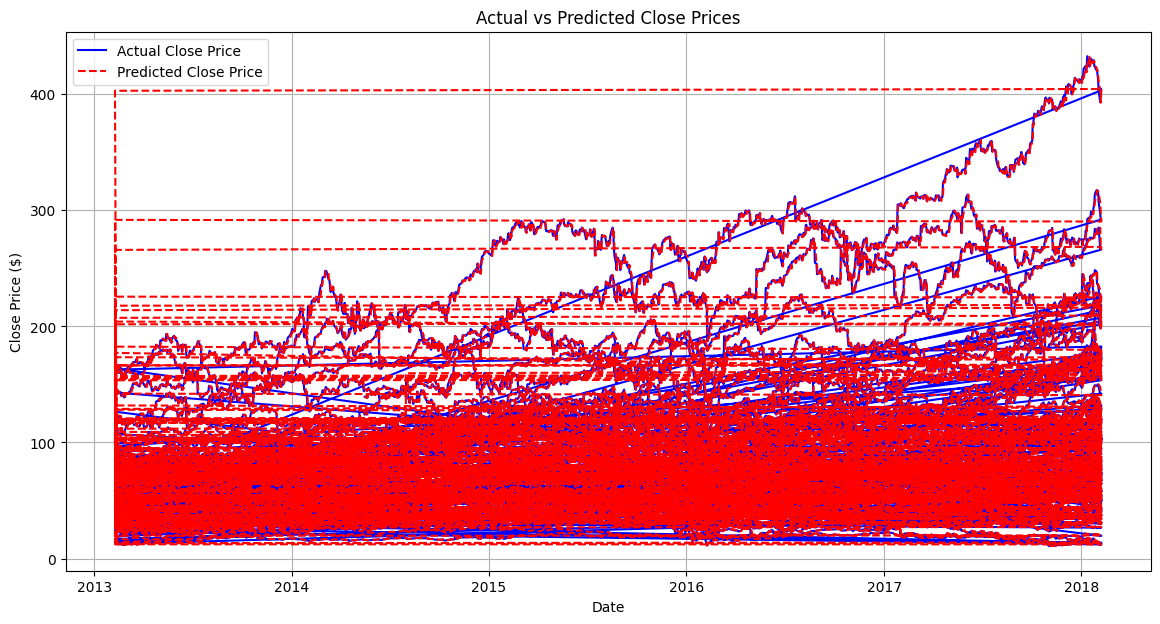

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Close Price', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Close Price', color='red', linestyle='--')
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.legend(loc='best')
plt.grid(True)
plt.show()

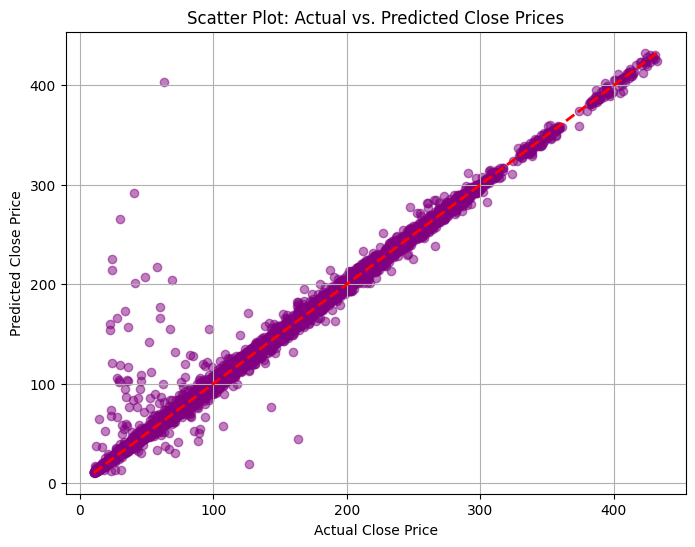

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Scatter Plot: Actual vs. Predicted Close Prices')
plt.grid(True)
plt.show()

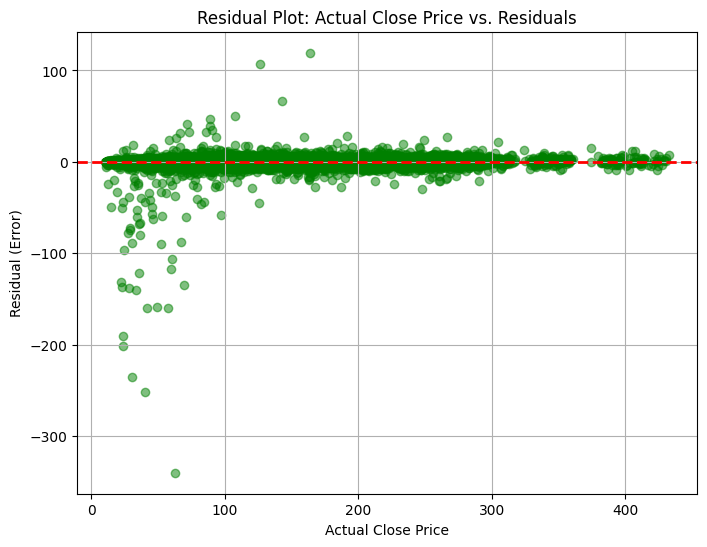

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, alpha=0.5, color='green')
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.xlabel('Actual Close Price')
plt.ylabel('Residual (Error)')
plt.title('Residual Plot: Actual Close Price vs. Residuals')
plt.grid(True)
plt.show()

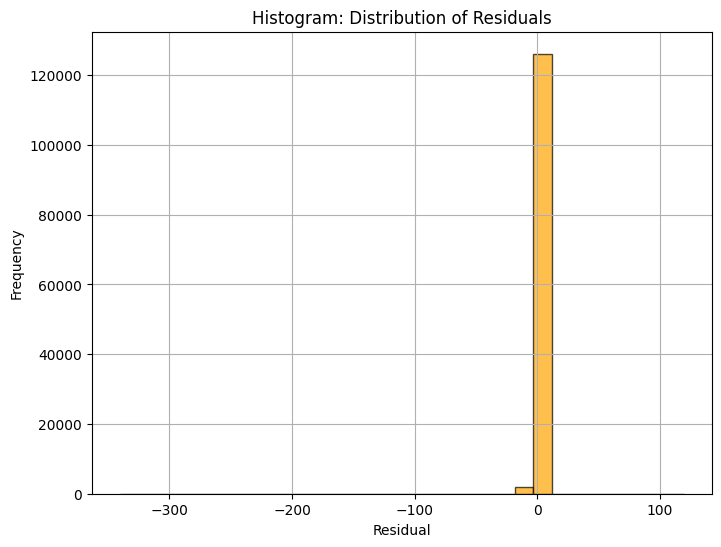

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7, color='orange')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histogram: Distribution of Residuals')
plt.grid(True)
plt.show()

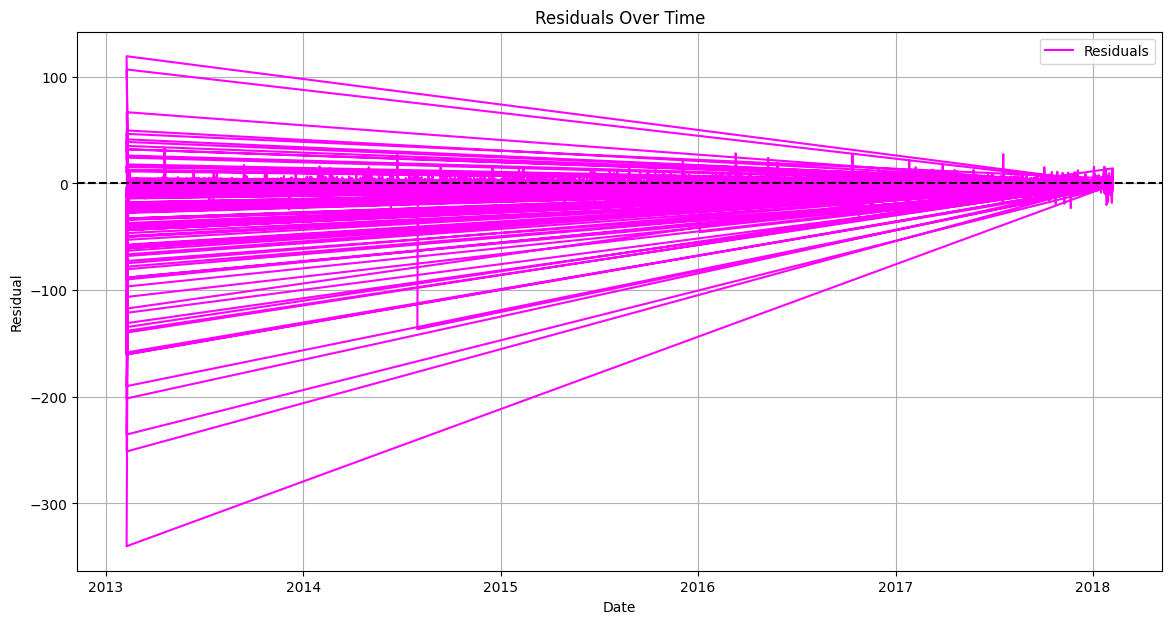

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, residuals, label="Residuals", color='magenta')
plt.axhline(0, color='black', linestyle='--')
plt.title("Residuals Over Time")
plt.xlabel("Date")
plt.ylabel("Residual")
plt.legend()
plt.grid(True)
plt.show()